In [51]:
##loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
##loading dataset
df = pd.read_csv("/content/iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [15]:
##dataset info
def data_info():
  df['Purchase Iphone'].value_counts()
  df.info()
  df.describe()
  df.isnull().sum()


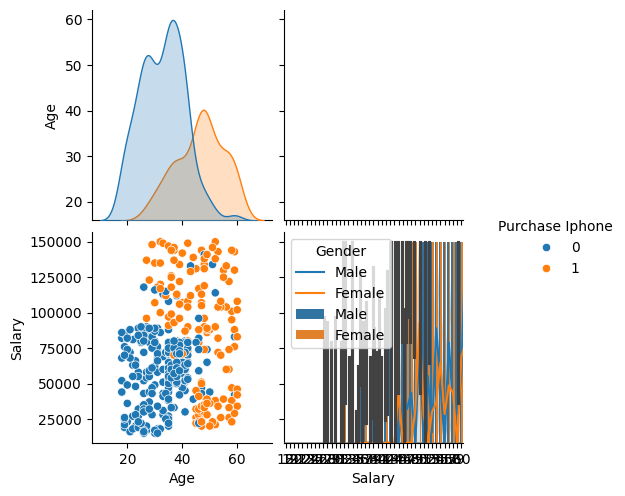

In [69]:
##plotting all the patterns
def plots():
  sns.pairplot(df, hue='Purchase Iphone')
  sns.lineplot(x='Age', y='Purchase Iphone', data=df, hue = 'Gender')
  sns.barplot(x='Age', y='Purchase Iphone', data=df, hue = 'Gender')
plots()

###Inference -
1. In the case of Male, the buying rate of Iphone more in their early 40's.
2. In case of Female, the buying rate of Iphone is more in their early 30's.

In [17]:
X = df[['Age', 'Salary']]
y = df['Purchase Iphone']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
clf = KNeighborsClassifier(n_neighbors=5)
KN_model = clf.fit(X_train, y_train)
KN_model

KNeighborsClassifier()

In [47]:
sqrt(df.shape[0]) ##19 or 21

20.0

In [48]:
pred = KN_model.predict(X_test)
pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [49]:
acc_score = accuracy_score(y_test, pred)
acc_score

0.825

<Axes: >

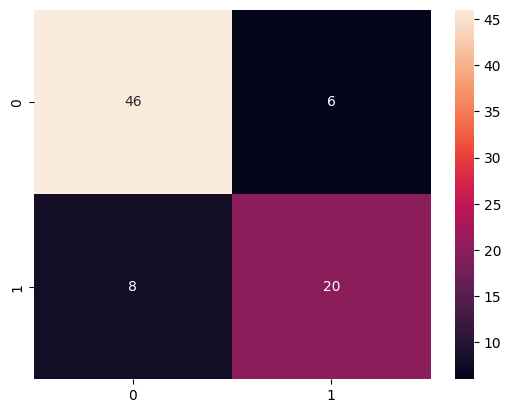

In [50]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True)

In [43]:
##error method
error = []
for i in range(1, 26):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train, y_train)
  pred_i = clf.predict(X_test)
  error.append(1 - accuracy_score(y_test, pred_i))

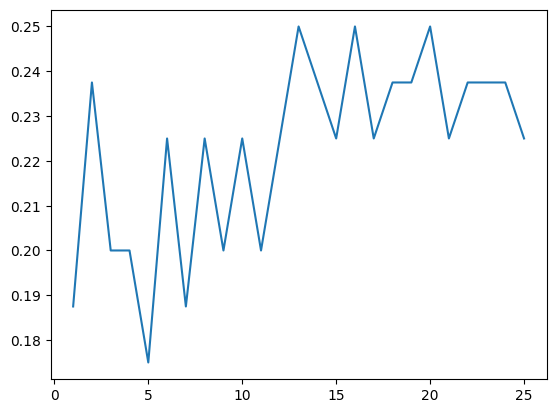

In [45]:
plt.plot(range(1, 26), error)

In [52]:
##saving the model
import joblib
joblib.dump(KN_model, 'KN_model.pkl')

['KN_model.pkl']

###The model accuracy is 82.5% with KNearest Neighbour of 5.